In [132]:
import glob

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [163]:
# Specify here the path
V = "1"
T = "GCN"
PATH = "../GCN2LY/evaluator_output/"+ V +"/losses/*.txt"

In [164]:
files = list(glob.glob(PATH))
files.sort(key=lambda x: ("precision" in x, len(x), x))

In [165]:
files

['../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses0.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses1.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses2.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses3.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses4.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses5.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses6.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses7.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses8.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses9.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses10.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses11.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses12.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses13.txt',
 '../amr-ganGCN/evaluator_output/1/losses/TRAININGlosses14.txt',
 '../amr-ganGCN/evaluator_output/1/

In [166]:
def plot_losses(training, development, p="class", v="1", t="RNN"):    
    plt.plot(training[p])
    plt.plot(development[p])
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Development'])
    plt.title('Training and development ' + p.replace("_", " ") + ' loss evolution')
    plt.savefig("/home/carlos/Pictures/" + t + v + p + ".png")
    plt.show()

In [167]:
training, development = {"class":[], "bbox_xy":[], "bbox_wh":[], "bbox_xy_MSE":[]}, {"class":[], "bbox_xy":[], "bbox_wh":[], "bbox_xy_MSE":[]}

In [168]:
for file in files:
    with open(file, "r") as f:
        lines = f.readline()
        losses = lines.split(" ")
        add = training
        if 'DEVELOPMENT' in file:
            add = development
            
        add['class'].append(float(losses[0]))
        add['bbox_xy'].append(float(losses[1]))
        add['bbox_wh'].append(float(losses[2]))
        add['bbox_xy_MSE'].append(float(losses[3]))
        

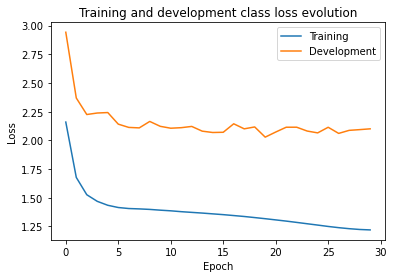

In [169]:
plot_losses(training, development, p="class", v=V, t=T)

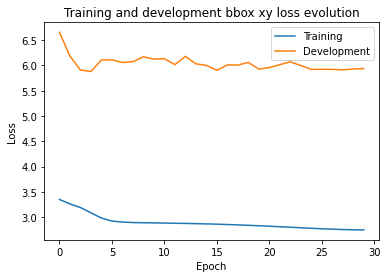

In [170]:
plot_losses(training, development, p="bbox_xy", v=V, t=T)

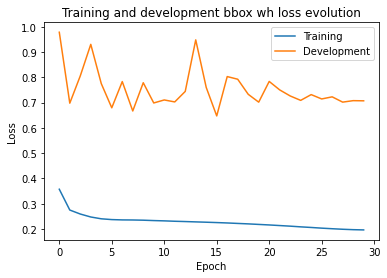

In [171]:
plot_losses(training, development, p="bbox_wh", v=V, t=T)

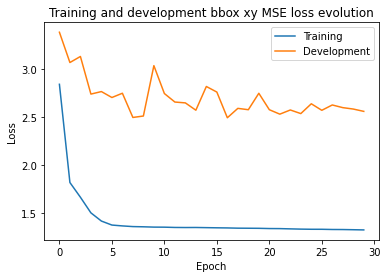

In [172]:
plot_losses(training, development, p="bbox_xy_MSE", v=V, t=T)